In [2]:
import pandas as pd
import numpy as np

In [3]:
shoes_data = pd.read_csv("shoes_data.csv")

In [4]:
shoes_data.head()

,brand,color,size,price,offer_price
0,Tresmode,Black,6.5,4647,4153
1,Lavie,Gold,4,2446,1172
2,FILA,Red,6,2346,1898
3,Crocs,Red,5,5942,5868
4,Crocs,Blue,4,2942,2118


In [5]:
shoes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5679 entries, 0 to 5678
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   brand        5679 non-null   object
 1   color        5679 non-null   object
 2   size         5679 non-null   object
 3   price        5679 non-null   int64 
 4   offer_price  5679 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 222.0+ KB


In [6]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()

for i in shoes_data.columns:
    if shoes_data[i].dtype == object:
        shoes_data[i] = labelEncoder.fit_transform(shoes_data[i])

shoes_data.head()

,brand,color,size,price,offer_price
0,26,4,25,4647,4153
1,14,45,18,2446,1172
2,6,89,24,2346,1898
3,5,89,22,5942,5868
4,5,22,18,2942,2118


In [7]:
shoes_data.isnull().sum()

brand          0
color          0
size           0
price          0
offer_price    0
dtype: int64

In [8]:
shoes_data.duplicated().sum()

1042

In [9]:
shoes_data.drop_duplicates(inplace = True)
shoes_data

,brand,color,size,price,offer_price
0,26,4,25,4647,4153
1,14,45,18,2446,1172
2,6,89,24,2346,1898
3,5,89,22,5942,5868
4,5,22,18,2942,2118
...,...,...,...,...,...
5670,8,4,28,2142,1053
5672,25,76,23,35447,31873
5673,6,52,3,3046,2172
5674,23,91,18,6747,5098


In [10]:
x = shoes_data.drop("price", axis = 1)
y = shoes_data["price"]

In [11]:
from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(
    x, y, test_size=0.3, random_state=42
)

In [12]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

In [13]:
linear_regression.fit(X_train, Y_train)

LinearRegression()

In [14]:
y_pred = linear_regression.predict(X_test)
y_pred

array([3097.58518412, 2913.41944605, 5195.224685  , ..., 3727.67173178,
       4771.54863324, 3158.05676542])

In [15]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print(f'r2_score = {r2_score(Y_test, y_pred) * 100:.2f}%')
print(f'mae = {mean_absolute_error(Y_test, y_pred):.2f}')
print(f'mse = {mean_squared_error(Y_test, y_pred):.2f}')

r2_score = 97.80%
mae = 697.88
mse = 735182.74


In [16]:
697.88 ** 2

487036.49439999997

In [17]:
735182 - 487036

248146

In [20]:
shoes_data.describe()

,brand,color,size,price,offer_price
count,4637.000000,4637.000000,4637.000000,4637.000000,4637.000000
mean,13.009273,44.568687,19.486953,5154.979297,4161.530515
std,9.180937,35.792903,9.973244,5702.295030,5074.841975
min,0.000000,0.000000,0.000000,1346.000000,773.000000
25%,5.000000,5.000000,13.000000,2942.000000,1973.000000
50%,8.000000,27.000000,24.000000,3746.000000,2868.000000
75%,23.000000,81.000000,28.000000,4746.000000,4153.000000
max,29.000000,114.000000,37.000000,37947.000000,34123.000000


<Axes: >

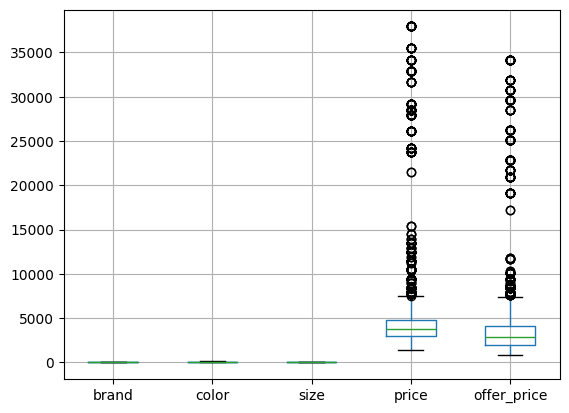

In [22]:
shoes_data.boxplot()

In [23]:
x = np.array(2,4,19,54,66)

TypeError: array() takes from 1 to 2 positional arguments but 5 were given